# Tutorial - Topic Modeling

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
df = fetch_20newsgroups()

In [4]:
#We are just naming the categories but as this is an unsupervised algorithm we're not actually using them.
categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
remove = ('headers','footers','quotes')
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)


In [5]:
newsgroups_train.filenames.shape, newsgroups_test.target.shape, newsgroups_train.target.shape

((2034,), (1353,), (2034,))

In [6]:
print("\n".join(newsgroups_train.data[:4]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

hint : definition of perijove is the point in the orbit of a satellite of Jupiter neares the planet's center

In [7]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

The target attribute is the integer index of the category.

In [8]:
#target attribute are the index of the category, of our matrix
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [9]:
num_topics, num_top_words = 6, 8

## Stop words, stemming, lemmatization
### NLTK

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk import stem

In [11]:
sorted(set(stopwords.words('english')))[:20]
stopwords = set(stopwords.words('english'))

Take in count there is no single universal list of stopwords, in my case I'm using NLTK

## Stemming and Lemmatization
Stemming and lemmatization both generate the root form of the words.
Lemmatization uses the rules about a language. The resulting tokens are all actual words.
Stemming is the poor-man's lemmatization. Stemming is a crude heuristic that chops the ends off
of the words. the resulting tokens may not be actuatl words. Stemming is faster

In [12]:
wn1 = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [13]:
word_list = ['feet','foot', 'foots', 'footing']

In [14]:
[wn1.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [15]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

## Spacy
Stemming and lemmatization are implementation dependent
Spacy is a very modern and fast nlp library. Spacy is opinionated. In that typically 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
vectorizer = CountVectorizer(stop_words = 'english') #tokenizer = Lemmatokenizer()

In [18]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() #documents, vocab 
vectors.shape 

(2034, 26576)

In [19]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [20]:
vocab = np.array(vectorizer.get_feature_names_out())

In [21]:
vocab.shape

(26576,)

In [22]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype=object)

# Singular Value Decomposition (SVD)
We would clearly expect that the words that appear most frequently in one topic would appear less frequently in the other- otherwise that word wouldn't make a good choice to separate out the two topics. Therefore, we expect the topics to be orthogonal.
The SVD algorthim factorizes a matrix into one matrix with **orthogonal columns** and one with orthogonal rows (along with a diagonal matrix, which contains the **relative importance** of each factor).

SVD is an *exact decomposition*, since the matrices it creates are big enough to fully cover the original matrix. SVD is extremely widely used in linear algebra, and specifically in data science, including:
1. semantic analysis
2. Collaborative filtering/recommendations
3. Calculate moore-penrose pseudoinverse
4. Data compression
5. Principal component analysis 

* words that are frequently in one topic are probably less likely to be in other topics.
* ortogonal - > their columns and rows are ortonormal.
    you are capturing very different information. 
    
            In this context we want very different topics.

The following code is to know how long is it taking, this is the decomposition of the imput

In [23]:
%time U, s, Vh =linalg.svd(vectors, full_matrices=False)
#Otherwise it will come up with extra columns and its not necessary

CPU times: user 4min 11s, sys: 26 s, total: 4min 37s
Wall time: 43.3 s


In [24]:
s.shape, U.shape, Vh.shape
np.diag(np.diag(s[:4]))

array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

Exercise : Confirm that U, s, Vh is a decomposition of vectors:

In [25]:
# 1. Multiply the matrices together.
reconstructed_vectors = U @ np.diag(s) @Vh
np.allclose(reconstructed_vectors, vectors)

True

In [26]:
#alternate way, checking the diference with 0s
np.linalg.norm(reconstructed_vectors - vectors)


9.46034008001976e-12

### Topics

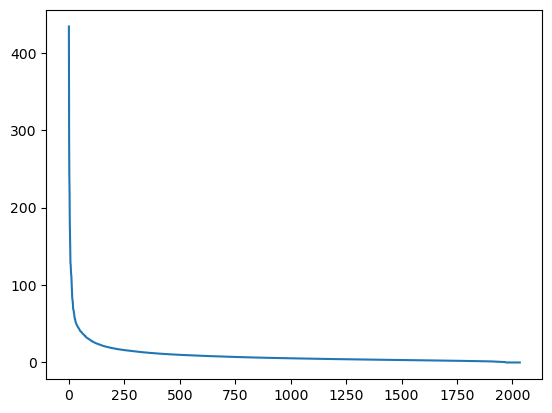

In [27]:
plt.plot(s);

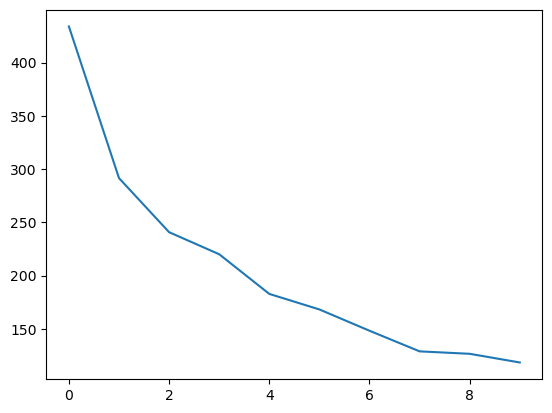

In [28]:
plt.plot(s[:10])

In [29]:
num_top_words = 8
# decide what are the higher values for each topic in order to assign an optimal name for the topic
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t) [:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [''.join(t) for t in topic_words]

In [30]:
show_topics(Vh[:10])

['dittocrituspropagandistsurnamegalacticentrickindergartensurrealimaginative',
 'jpeggiffilecolorqualityimagejfifformat',
 'graphicsedupubmail1283drayftp',
 'jesusgodmatthewpeopleatheistsatheismdoesgraphics',
 'imagedataprocessinganalysissoftwareavailabletoolsdisplay',
 'godatheistsatheismreligiousbelievereligionargumenttrue',
 'spacenasalunarmarsprobemoonmissionsprobes',
 'imageprobesurfacelunarmarsprobesmoonorbit',
 'argumentfallacyconclusionexampletrueadargumentumpremises',
 'spacelarsonimagetheoryuniversephysicalnasamaterial']

we get topics that match the kinds of clusters we would expect! This is despite the fact that this is an unsupervised algorithm- which is to say, we never actually told the algorith how our documents are grouped.

We will return to SVD in much more detail later. For now, the important takeaway is thatwe have a tool that allows us to exactly factor a matrix into orthogonal columns and orthogonal rows.

## Non-negative Matrix Factorization (NMF)
$Idea$

Rather than constraining our factors to be orthogonal, another idea would to constrain them to be non-negative. NMF is a factorization of a non-negative data set V:

V = WH

into non-negative matrices W, H. Often positive factors will be more easily interpretable( and this is the reason behing NMF's popularity)

Nonnegative matrix factorization (NMF) is a non-exact factorization that factors into one skinny positive matrix and one short positive matrix. NMP is a NP-hard and non-unique. Therer are a number of variations on it, created by adding different constraints.


- what is the meaning of the negatives??
- resulting matrices are ortogonal!

### Aplications of NMF
1. Face decompositions
2. Collaborative filtering, eg movie recommendations
3. Audio source separation
4. Chemistry
5. Bioinformatics and Gene Expression
6. Topic modeling (our problem!)

### NMF from sklearn
First, we will use scikit - learn's implementation of NMF:

In [31]:
m,n=vectors.shape
d=5  # num topics

In [32]:

vectors = vectorizer.fit_transform(newsgroups_train.data).toarray() # Use .toarray() instead of .todense()

m, n = vectors.shape
d = 5  # num topics

clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_


In [33]:
show_topics(H1)

['jpegimagegiffilecolorimagesformatquality',
 'edugraphicspubmail128rayftpsend',
 'spacelaunchsatellitenasacommercialsatellitesyearmarket',
 'jesusgodpeoplematthewatheistsdoesatheismsaid',
 'imagedataavailablesoftwareprocessingftpeduanalysis']

### TF-IDF
Topic frequency inverse document frequency normalices term counts by taking into account how often they appear in a document, how long the document is, and how common/rare the term is.

TF = # occurrences of term t in document/ #of words in documents

IDF = log(# of documents/ #focuments with term t in it)

In [34]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) #documents, vocab

In [35]:
W1 = clf.fit_transform(vectors_tfidf)
M1 = clf.components_

In [36]:
show_topics(M1)

['peopledonthinkjustlikeobjectivesaymorality',
 'graphicsthanksfilesimagefileprogramwindowsknow',
 'spacenasalaunchshuttleorbitmoonlunarearth',
 'icobobbetekbeauchainebronxmanhattansankqueens',
 'godjesusbiblebelievechristianatheismdoesbelief']

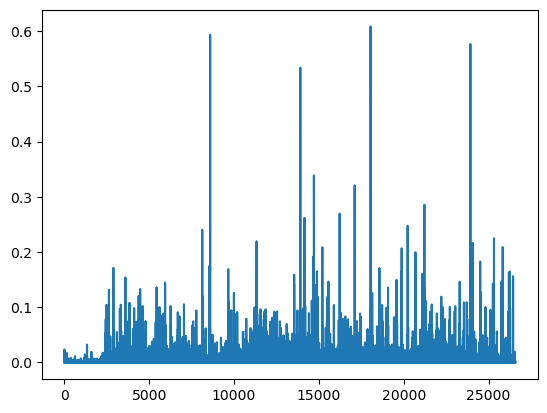

In [37]:
plt.plot(clf.components_[0])

In [38]:
clf.reconstruction_err_

43.71292606348651

## NMF in summary

Benefits: Fast and easy to use!

Downsides: took years of research and expertise to create

Notes: 

- For NMF, matrix needs to be at least as tall as it is wide, or we get and error with fit_transform
- Can use df_min in CountVectorizer to only look at words that were in at least k of the split texts.

## NMF from scratch in numpy, using SGD

### Gradient Descent
The idea of standard gradient descent:
1. Randomly choose some weights to start
2. Loop:
    -  Use weights to calculate a prediction
    - Calculate the derivate of the loss
    - Update the weights

3. Repeat step 2 lots of times. Eventually we end up with decent weights.

**key:** We want to decrease our loss and the derivate tells us the direction of **steepest descent**.

Note that *loss, error, and cost* are all terms used to describe the same thing.

*Stochastic Gradient Descent (SGD*)
**Stochastic gradient descent** is an incredibly useful optimization method (it is also the heart of DL, where it is used for backpropagation)

For standard gradient descent, we evaluate the loss using all of out data which can be really slow. In stochastic gradient descent, we evaluate our loss functino on just a sample of our data (sometimes called a mini-batch). We would get different loss values on different samples of the data, so this is why it is stochastic. It turns out that this is still an effective way to optimize, and it's much more efficient!


### Applying SGD to NMF

**Goal:** Decompose V(m×n)
 into
V≈WH
where W(m×d)
 and H(d×n)
, W,H>=0
, and we've minimized the Frobenius norm of V−WH
.

Approach: We will pick random positive W
 & H
, and then use SGD to optimize.

To use SGD, we need to know the gradient of the loss function.

Sources:

Optimality and gradients of NMF: http://users.wfu.edu/plemmons/papers/chu_ple.pdf
Projected gradients: https://www.csie.ntu.edu.tw/~cjlin/papers/pgradnmf.pdf




In [39]:
lam=1e3
lr=1e-2
m, n = vectors_tfidf.shape

In [40]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [41]:
show_topics(H1)

['jpegimagegiffilecolorimagesformatquality',
 'edugraphicspubmail128rayftpsend',
 'spacelaunchsatellitenasacommercialsatellitesyearmarket',
 'jesusgodpeoplematthewatheistsdoesatheismsaid',
 'imagedataavailablesoftwareprocessingftpeduanalysis']

In [42]:
mu = 1e-6
def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH

In [43]:
def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))

In [44]:
def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH

In [45]:
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [46]:
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [47]:
report(vectors_tfidf, W, H)

44.42444384185976 2.3442431176680485e-06 5.162518290728227e-09 0 0


In [48]:
upd(vectors_tfidf,W,H,lr)

In [49]:
report(vectors_tfidf, W, H)

44.416963403738464 -0.0007428948896975433 -7.190551865929277e-05 142 275


In [50]:
for i in range(50): 
    upd(vectors_tfidf,W,H,lr)
    if i % 10 == 0: report(vectors_tfidf,W,H)

44.411356270956574 -0.000909817042478581 -7.171524369260742e-05 136 285
44.37447492428623 -0.00028146959841366173 -6.39734120573261e-05 34 490
44.345898915206845 -0.00015203097850151223 -5.6811566160959594e-05 37 952
44.31397422390114 -0.00024023149903561203 -7.820957113167658e-05 38 1477
44.2788869695264 -0.00011600765833633353 -0.00013754373466505178 33 2213


In [51]:
show_topics(H)

['donspacethinkpeoplejustgodlikedoes',
 'godspacepeoplethinkdonlikejustknow',
 'godspacepeopledonknowjustthinklike',
 'peoplespacegoddonjustknowthinklike',
 'spacegoddonpeoplejustknowlikethink']

## Pytorch
Pytorch is a Python frameword for tensors and dynamic neural networds with GPU acceleration. Many of the core contributors work on Facebook's AI team. In many ways, it is similar to Numpy, only with the increased parallelization of using a GPU.

## What is PyTorch?
It's a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs.
- A deep learning research platform that provides maximum flexibility and speed.

**Note about GPUs:** If you are not using a GPU, you will need to remove .cuda() from the methods below. GPU usage is not required for this course, but I thought it would be of interest to some of you.

In [52]:
pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/7b/7c/4d8728e6f8dbe2b8af054bd92c290d94c633270443514e3ee4b768125cf9/torch-2.1.0-cp311-none-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 12.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [63]:
import torch
import torch as tc
from torch.autograd import Variable

In [64]:
def V(M): return Variable(M, requires_grad=True)

In [65]:
v = vectors_tfidf.todense()

In [66]:
t_vectors = torch.Tensor(v.astype(np.float32))

In [67]:
mu = 1e-5

In [68]:
def grads_t(M, W, H):
    R = W.mm(H)-M
    return (R.mm(H.t()) + penalty_t(W, mu)*lam, 
        W.t().mm(R) + penalty_t(H, mu)*lam) # dW, dH

def penalty_t(M, mu):
    return (M<mu).type(tc.FloatTensor)*torch.clamp(M - mu, max=0.)

def upd_t(M, W, H, lr):
    dW,dH = grads_t(M,W,H)
    W.sub_(lr*dW); H.sub_(lr*dH)

def report_t(M,W,H): 
    print((M-W.mm(H)).norm(2), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [69]:
t_W = tc.FloatTensor(m,d)
t_H = tc.FloatTensor(d,n)
t_W.normal_(std=0.01).abs_(); 
t_H.normal_(std=0.01).abs_();

In [70]:
d=6; lam=100; lr=0.05

In [71]:
for i in range(1000): 
    upd_t(t_vectors,t_W,t_H,lr)
    if i % 100 == 0: 
        report_t(t_vectors,t_W,t_H)
        lr *= 0.9

tensor(44.3379) tensor(-0.0056) tensor(-0.0006) tensor(1489) tensor(2126)
tensor(43.6595) tensor(-0.0096) tensor(-0.0126) tensor(2142) tensor(22853)
tensor(43.6220) tensor(-0.0050) tensor(-0.0069) tensor(2225) tensor(21792)
tensor(43.6143) tensor(-0.0072) tensor(-0.0035) tensor(2388) tensor(22080)
tensor(43.6132) tensor(-0.0048) tensor(-0.0091) tensor(2575) tensor(21883)
tensor(43.6128) tensor(-0.0042) tensor(-0.0066) tensor(3028) tensor(23548)
tensor(43.6124) tensor(-0.0040) tensor(-0.0068) tensor(3153) tensor(24746)
tensor(43.6122) tensor(-0.0037) tensor(-0.0056) tensor(3117) tensor(26143)
tensor(43.6120) tensor(-0.0038) tensor(-0.0075) tensor(2967) tensor(26173)
tensor(43.6118) tensor(-0.0034) tensor(-0.0069) tensor(3913) tensor(34193)


In [72]:
show_topics(t_H.cpu().numpy())

['donthinkpeoplejustobjectivelikemoralitysay',
 'icobobbetekbeauchainebronxmanhattansankqueens',
 'godatheismbelievebeliefexistdoesexistenceatheists',
 'jesusbiblechristianchristianschristlawkoreshgod',
 'spacenasalaunchshuttleorbitmoonlunarearth',
 'thanksgraphicsfilesimagefileprogramwindowsknow']

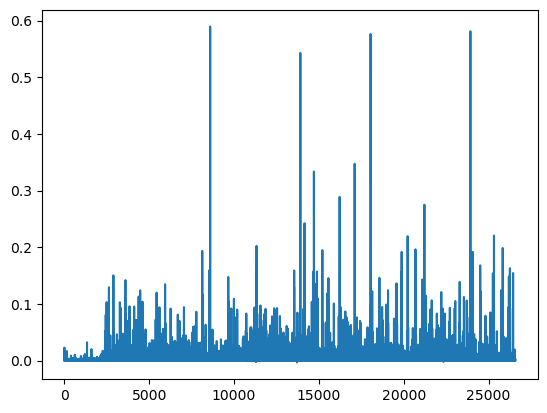

In [73]:
plt.plot(t_H.cpu().numpy()[0])

In [74]:
t_W.mm(t_H).max()

tensor(0.5257)

In [75]:
t_vectors.max()

tensor(1.)

### Pytorch: autograd

Above, we used our knowledge of what the gradient of the loss function was to do SGD from scratch in PyTorch. However, PyTorch has an automatic differentiation package, **autograd** which we could use instead. This is really useful, in that we can use autograd on problems where we don't know what the derivative is.

The approach we use below 

In [76]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [77]:
print(x.data)

tensor([[1., 1.],
        [1., 1.]])


In [78]:
print(x.grad)

None


In [79]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [80]:
z = y * y * 3
out = z.sum()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(108., grad_fn=<SumBackward0>)


In [81]:
out.backward()
print(x.grad)

tensor([[18., 18.],
        [18., 18.]])


### Using Autograd for NMF

In [86]:
lam=1e6

In [87]:
pW = Variable(tc.FloatTensor(m,d), requires_grad=True)
pH = Variable(tc.FloatTensor(d,n), requires_grad=True)
pW.data.normal_(std=0.01).abs_()
pH.data.normal_(std=0.01).abs_();

In [96]:
def report():
    W, H = pW.data, pH.data
    loss_value = (M - pW.mm(pH)).norm(2).item()
    min_W, min_H = W.min().item(), H.min().item()
    num_negative_W, num_negative_H = (W < 0).sum().item(), (H < 0).sum().item()
    print(loss_value, min_W, min_H, num_negative_W, num_negative_H)

def penalty(A):
    return torch.pow((A < 0).type(torch.FloatTensor) * torch.clamp(A, max=0.), 2)

def penalize():
    return penalty(pW).mean() + penalty(pH).mean()

def loss():
    return (M - pW.mm(pH)).norm(2) + penalize() * lam

In [97]:
M = Variable(t_vectors)

In [98]:
opt = torch.optim.Adam([pW,pH], lr=1e-3, betas=(0.9,0.9))
lr = 0.05
report()

44.33531951904297 3.4341189802944427e-06 7.243922794941682e-09 0 0


In [99]:
for i in range(1000): 
    opt.zero_grad()
    l = loss()
    l.backward()
    opt.step()
    if i % 100 == 99: 
        report()
        lr *= 0.9     # learning rate annealling

43.904762268066406 -0.0009331197943538427 -0.0013190489262342453 218 11844
43.7391242980957 -0.000619209953583777 -0.0019467896781861782 252 14064
43.672027587890625 -0.00033383347908966243 -0.0006904974579811096 231 15248
43.626373291015625 -0.00043209060095250607 -0.0008471616893075407 173 15175
43.60619354248047 -0.00028567539993673563 -0.001013037282973528 189 14620
43.60174560546875 -0.00026337068993598223 -0.0006662865052931011 187 13702
43.601627349853516 -0.0002677712473087013 -0.0007065327954478562 215 12374
43.60163116455078 -0.0002526017196942121 -0.0006223229574970901 234 10788
43.601806640625 -0.000265185022726655 -0.0005499721737578511 287 9597
43.60187530517578 -0.0002477344824001193 -0.000500229187309742 312 8788


In [100]:
h = pH.data.cpu().numpy()
show_topics(h)

['donpeoplejustthinklikeknowsayreligion',
 'spacenasalaunchshuttleorbitlunarmoonearth',
 'godjesusbiblebelieveatheismchristiandoesbelief',
 'objectivemoralityvaluesmoralsubjectivescienceabsoluteclaim',
 'icobobbetekbeauchainebronxmanhattansankqueens',
 'thanksgraphicsfilesimagefileprogramwindowsformat']

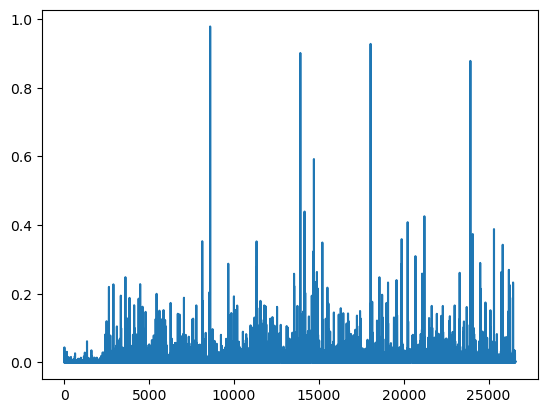

In [101]:
plt.plot(h[0]);

### Comparing Approaches
#### Scikit-Learn's NMF

-Fast

-No parameter tuning

-Relies on decades of academic research, took experts a long time to implement

Factorization Algorithms
• BD - Bayesian nonnegative matrix factorization Gibbs sampler [Schmidt2009]
• BMF - Binary matrix factorization [Zhang2007]
• ICM - Iterated conditional modes nonnegative matrix factorization [Schmidt20091
• LENMF - Fisher nonnegative matrix factorization for learning local features
[Wang2004], [Li2001) • LSNMF Alternating nonnegative least squares matrix factorization using projected
gradient method for subproblems [Lin2007] • NMF - Standard nonnegative matrix factorization with Euclidean / Kullback-Leibler update equations and Frobenius / divergence / connectivity cost functions
[Lee2001], [Brunet2004]
NSNMF - Nonsmooth nonnegative matrix factorization [Montano2006!
• PMF - Probabilistic nonnegative matrix factorization [Laurberg2008], [Hansen2008] • PSMF - Probabilistic sparse matrix factorization [Dueck2005], [Dueck20041,
[Srebro2001], [Li2007] SNMF - Sparse nonnegative matrix factorization based on alternating nonnegativity
constrained least squares [Park2007]
• SNMNMF - Sparse network regularized multiple nonnegative matrix factorization
[Zhang2011]
• PMFCC - Penalized matrix factorization for constrained clustering [FWang2008] • SepNMF - Separable nonnegative matrix factorization [Gillis2014], [Kumar2013],
(Tepper2015), Kapralov2016]

source: [Python Nimfa Documentation](http://nimfa.biolab.si/)

#### Using PyTorch and SGD

- Took us an hour to implement, didn't have to be NMF experts

- Parameters were fiddly

- Not as fast (tried in numpy and was so slow we had to switch to PyTorch)

### Truncated SVD

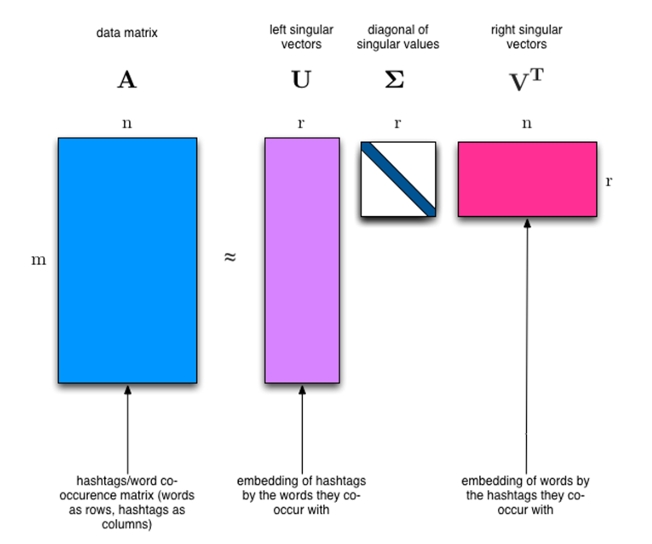

(source: [Facebook Research: Fast Randomized SVD](https://research.fb.com/fast-randomized-svd/))

#### Shortcomings of classical algorithms for decomposition:

-Matrices are "stupendously big"

-Data are often missing or inaccurate. Why spend extra computational resources when imprecision of input limits precision of the output?

-Data transfer now plays a major role in time of algorithms. Techniques the require fewer passes over the data may be substantially faster, even if they require more flops (flops = floating point operations).

-Important to take advantage of GPUs.

(source: Halko)

#### Advantages of randomized algorithms:

-inherently stable

-performance guarantees do not depend on subtle spectral properties

-needed matrix-vector products can be done in parallel

(source: Halko)

### Randomized SVD

In [103]:
vectors.shape

(2034, 26576)

In [104]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 4min 56s, sys: 30 s, total: 5min 26s
Wall time: 52.4 s


In [105]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [106]:
%time u, s, v = decomposition.randomized_svd(vectors, 5)

CPU times: user 18.7 s, sys: 6.54 s, total: 25.2 s
Wall time: 4.23 s


The runtime complexity for SVD is (min(m2n,mn2))

Question: How can we speed things up? (without new breakthroughs in SVD research)

Idea: Let's use a smaller matrix (with smaller n)!

Instead of calculating the SVD on our full matrix A which is m×n, let's use B=AQ, which is just m×r and r<<n

We haven't found a better general SVD method, we are just using the method we have on a smaller matrix.

In [107]:
%time u, s, v = decomposition.randomized_svd(vectors, 5)

CPU times: user 20.3 s, sys: 7.22 s, total: 27.6 s
Wall time: 4.67 s


In [108]:
u.shape, s.shape, v.shape

((2034, 5), (5,), (5, 26576))

In [109]:
show_topics(v)

['jpegimageedufilegraphicsimagesgifdata',
 'jpeggiffilecolorqualityimagejfifformat',
 'spacejesuslaunchgodpeoplesatellitematthewatheists',
 'jesusgodmatthewpeopleatheistsatheismdoesgraphics',
 'imagedataprocessinganalysissoftwareavailabletoolsdisplay']

Here are some results from Facebook Research:

### Benchmarks

We consider a few cases. We consider

• Large dense matrices, up to 100,000 x 200,000 in size,

• Large sparse matrices, up to 10% × 107 in size with O(109) non-zero elements,

• A comparison to Apache Spark's distributed SVD implementation. 

Throughout, we compute a rank 10 approximation, and we run two iterations of the power method. For the dense case, we compare against numpy.linalg.svd, and the
sparse case, we compare against scipy.sparse. linalg.svds.

#### Timings 

106 x 105 matrix with 107 non-zeros, 1 second vs 100 seconds with ARPACK, 

106 x 105 matrix with 108 non-zeros, 5 seconds vs 63 minutes with ARPACK,

105 × 105 dense matrix in 120 seconds, 

9.4 * 107 x 4 * 103 matrix with 1.6 * 109 non-zeros, 60 seconds on single machine server

vs 50 seconds on a 68 machine cluster with Spark.

Johnson-Lindenstrauss Lemma: (from wikipedia) a small set of points in a high-dimensional space can be embedded into a space of much lower dimension in such a way that distances between the points are nearly preserved.

It is desirable to be able to reduce dimensionality of data in a way that preserves relevant structure. The Johnson–Lindenstrauss lemma is a classic result of this type.

### Implementing our own Randomized SVD

In [111]:
from scipy import linalg

The method randomized_range_finder finds an orthonormal matrix whose range approximates the range of A (step 1 in our algorithm above). To do so, we use the LU and QR factorizations, both of which we will be covering in depth later.

I am using the scikit-learn.extmath.randomized_svd source code as a guide.

In [112]:
# computes an orthonormal matrix whose range approximates the range of A
# power_iteration_normalizer can be safe_sparse_dot (fast but unstable), LU (imbetween), or QR (slow but most accurate)
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

And here's our randomized SVD method:

In [113]:
def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    # project M to the (k + p) dimensional space using the basis vectors
    B = Q.T @ M
    
    # compute the SVD on the thin matrix: (k + p) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]

In [114]:
u, s, v = randomized_svd(vectors, 5)

In [115]:
%time u, s, v = randomized_svd(vectors, 5)

CPU times: user 12.8 s, sys: 3.6 s, total: 16.4 s
Wall time: 3.11 s


In [116]:
u.shape, s.shape, v.shape

((2034, 5), (5,), (5, 26576))

In [117]:
show_topics(v)

['jpegimageedufilegraphicsimagesgifdata',
 'edugraphicsdataspacepubmail1283d',
 'graphicsedupubmail1283drayftp',
 'jesusgodmatthewpeopleatheistsatheismdoesgraphics',
 'jpeggraphicsspacepubeduraymailsend']

Write a loop to calculate the error of your decomposition as you vary the # of topics. Plot the result

#### Answer

In [118]:
#Exercise: Write a loop to calculate the error of your decomposition as you vary the # of topics

In [119]:
plt.plot(range(0,n*step,step), error)

NameError: name 'step' is not defined

### More Details
Here is a process to calculate a truncated SVD, described in Finding Structure with Randomness: Probabilistic Algorithms for Constructing Approximate Matrix Decompositions and summarized in this blog post:

1. Compute an approximation to the range of A. That is, we want Q with r orthonormal columns such that
A≈QQTA

2. Construct B=QTA, which is small (r×n)

3. Compute the SVD of B by standard methods (fast since B is smaller than A), B=SΣVT

4. Since
A≈QQTA=Q(SΣVT)
if we set U=QS, then we have a low rank approximation A≈UΣVT.

#### So how do we find Q (in step 1)?

To estimate the range of A, we can just take a bunch of random vectors wi, evaluate the subspace formed by Awi. We can form a matrix W with the wi as it's columns. Now, we take the QR decomposition of AW=QR, then the columns of Q form an orthonormal basis for AW, which is the range of A.

Since the matrix AW of the product has far more rows than columns and therefore, approximately, orthonormal columns. This is simple probability - with lots of rows, and few columns, it's unlikely that the columns are linearly dependent.

#### The QR Decomposition

We will be learning about the QR decomposition in depth later on. For now, you just need to know that A=QR, where Q consists of orthonormal columns, and R is upper triangular. Trefethen says that the QR decomposition is the most important idea in numerical linear algebra! We will definitely be returning to it.

#### How should we choose r?

Suppose our matrix has 100 columns, and we want 5 columns in U and V. To be safe, we should project our matrix onto an orthogonal basis with a few more rows and columns than 5 (let's use 15). At the end, we will just grab the first 5 columns of U and V

So even although our projection was only approximate, by making it a bit bigger than we need, we can make up for the loss of accuracy (since we're only taking a subset later).

In [120]:
%time u, s, v = decomposition.randomized_svd(vectors, 5)

CPU times: user 13.4 s, sys: 7.55 s, total: 20.9 s
Wall time: 3.35 s


In [122]:
%time u, s, v = decomposition.randomized_svd(vectors, 5)

CPU times: user 16.3 s, sys: 7.26 s, total: 23.6 s
Wall time: 4 s


## END